<a href="https://colab.research.google.com/github/Grover1204/Stock-price-prediction/blob/main/Stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Kaggle API Python package
!pip install -q kaggle

In [ ]:
#Uploading file  the Google Colab environment
# Upload Kaggle.json file to authenticate and access the Kaggle API, which is used to download datasets
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"grover009","key":"df213bc82f83cd181a0574088199381d"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download -d stefanoleone992/mutual-funds-and-etfs

100% 353M/353M [00:04<00:00, 95.9MB/s]
100% 353M/353M [00:04<00:00, 81.0MB/s]


In [ ]:
!unzip /content/mutual-funds-and-etfs.zip

Archive:  /content/mutual-funds-and-etfs.zip
  inflating: ETF prices.csv          
  inflating: ETFs.csv                
  inflating: MutualFund prices - A-E.csv  
  inflating: MutualFund prices - F-K.csv  
  inflating: MutualFund prices - L-P.csv  
  inflating: MutualFund prices - Q-Z.csv  
  inflating: MutualFunds.csv         


In [ ]:
import pandas as pd
import glob


# Data Exploration

In [ ]:
df = pd.read_csv('/content/ETF prices.csv')

In [ ]:
df.head(10)

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
5,AAA,2020-09-16,24.97,24.98,24.97,24.97,24.75,14100
6,AAA,2020-09-17,24.99,25.00,24.98,24.98,24.76,15200
7,AAA,2020-09-18,24.97,24.98,24.97,24.98,24.76,5300
8,AAA,2020-09-21,24.99,24.99,24.98,24.98,24.76,8600
9,AAA,2020-09-22,24.98,24.99,24.98,24.98,24.76,8100


In [ ]:
len(df)

3866030

In [ ]:
df['fund_symbol'].unique()

array(['AAA', 'AAAU', 'AADR', ..., 'ZIVZF', 'ZROZ', 'ZSL'], dtype=object)

In [ ]:
# Filter out specific companies
companies = ['AAA', 'AAAU', 'AADR', 'ZROZ']

In [ ]:

df1 = df[df['fund_symbol'].isin(companies)]

# Set the date as index
df1['price_date'] = pd.to_datetime(df1['price_date'])
df1 = df.set_index('price_date')

<ipython-input-12-dd2f379a83c3>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['price_date'] = pd.to_datetime(df1['price_date'])


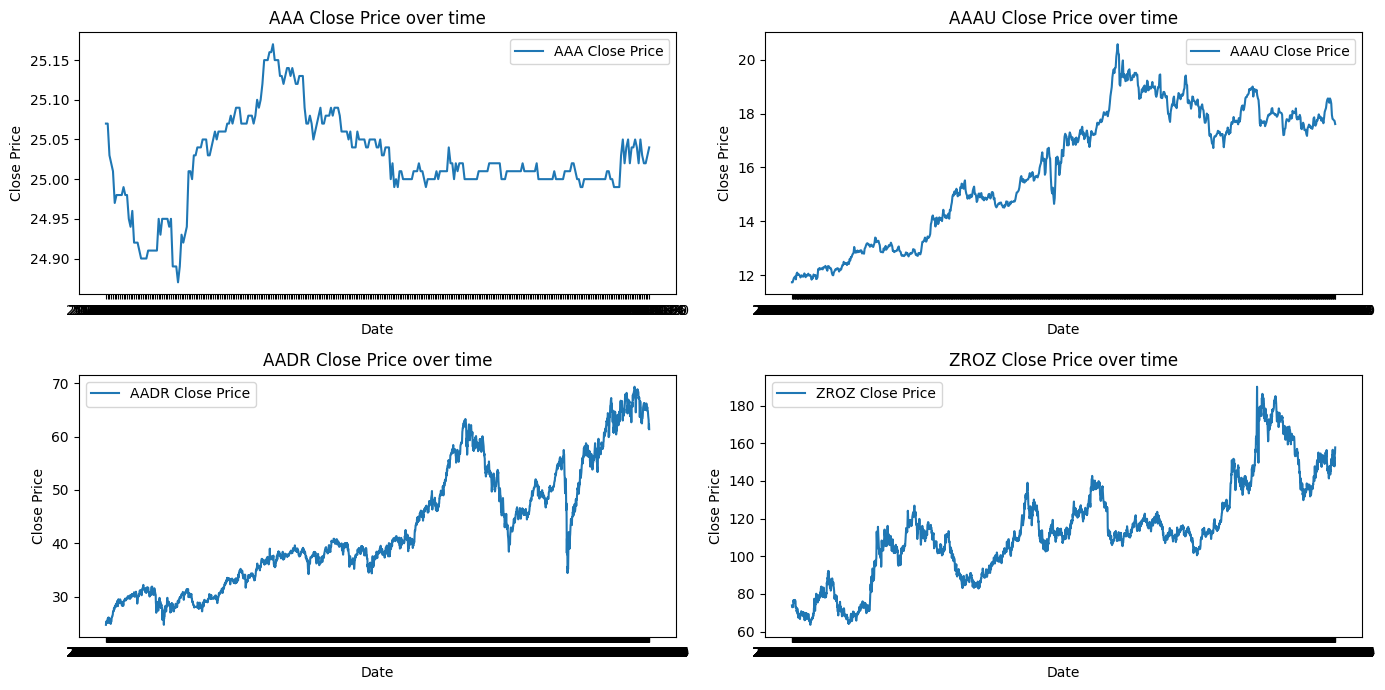

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

for i, company in enumerate(companies):
    row = i // 2
    col = i % 2
    selected = df1[df1['fund_symbol'] == company]
    axs[row, col].plot(selected['close'], label=f"{company} Close Price")
    axs[row, col].set_title(f'{company} Close Price over time')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Close Price')
    axs[row, col].legend()

plt.tight_layout()
plt.show()


In [ ]:
companies

['AAA', 'AAAU', 'AADR', 'ZROZ']

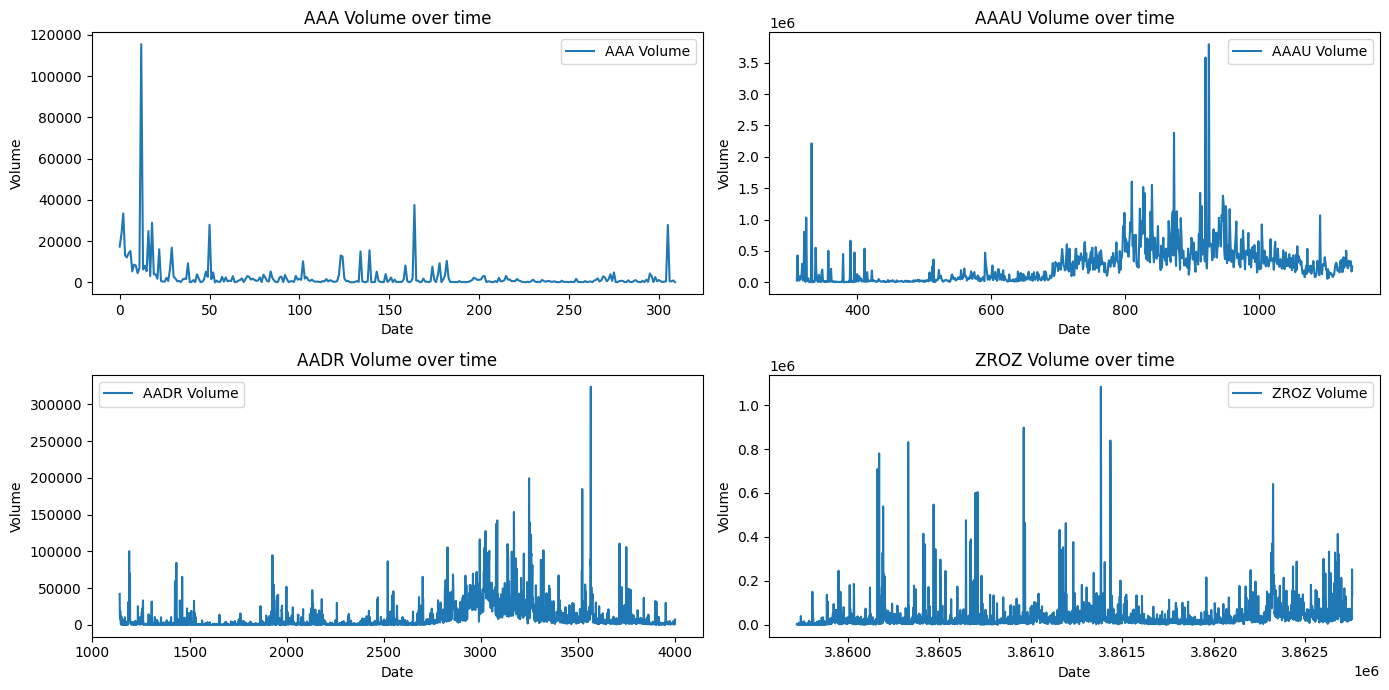

In [ ]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

for i, company in enumerate(companies):
    row = i // 2
    col = i % 2
    selected = df[df['fund_symbol'] == company]
    axs[row, col].plot(selected['volume'], label=f"{company} Volume")
    axs[row, col].set_title(f'{company} Volume over time')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Volume')
    axs[row, col].legend()

plt.tight_layout()
plt.show()


In [ ]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

for i, company in enumerate(companies):
    row = i // 2
    col = i % 2
    selected = df[df['fund_symbol'] == company]
    for column in ['open', 'high', 'close']:
        axs[row, col].plot(selected[column], label=f" {column}")
    axs[row, col].set_title(f'{company} Price over time')
    axs[row, col].set_xlabel('year')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()

plt.tight_layout()
plt.show()


NameError: ignored

In [ ]:
companies

['AAA', 'AAAU', 'AADR', 'ZROZ']

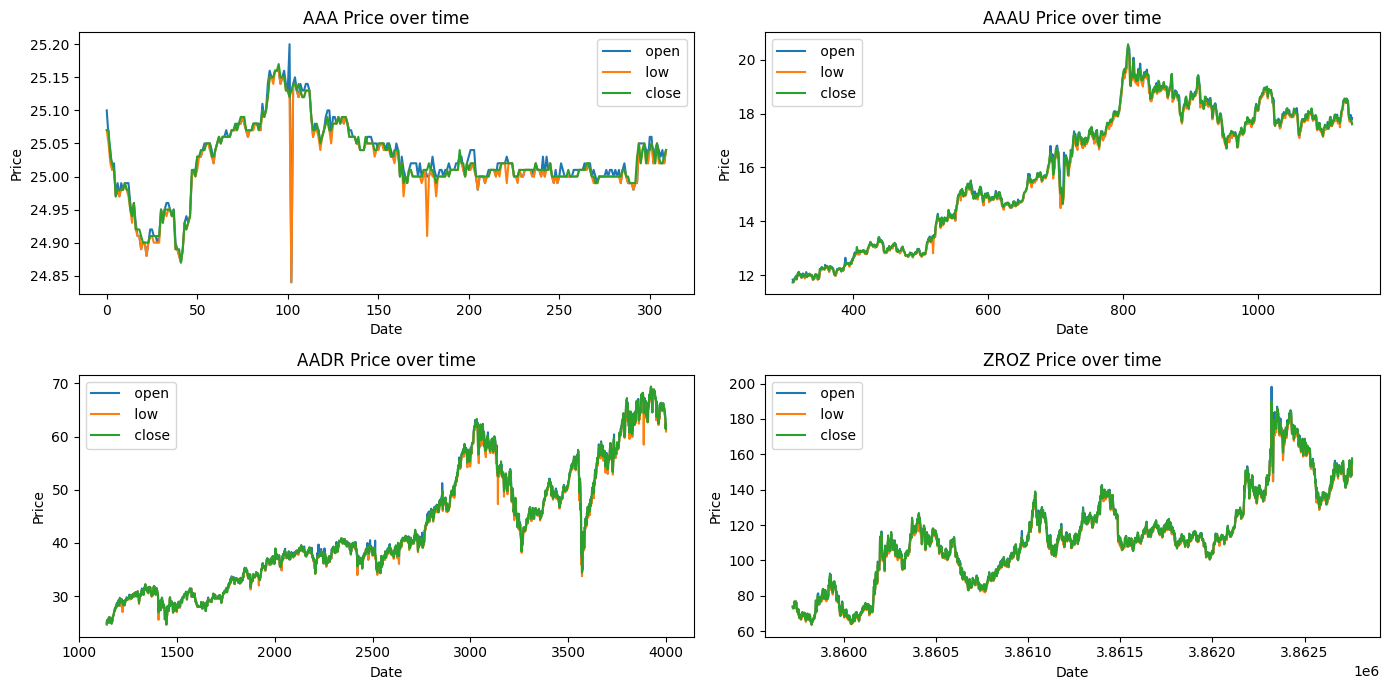

In [ ]:

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 7))

for i, company in enumerate(companies):
    row = i // 2
    col = i % 2
    selected = df[df['fund_symbol'] == company]
    for column in ['open', 'low', 'close']:
        axs[row, col].plot(selected[column], label=f" {column}")
    axs[row, col].set_title(f'{company} Price over time')
    axs[row, col].set_xlabel('Date')
    axs[row, col].set_ylabel('Price')
    axs[row, col].legend()

plt.tight_layout()
plt.show()


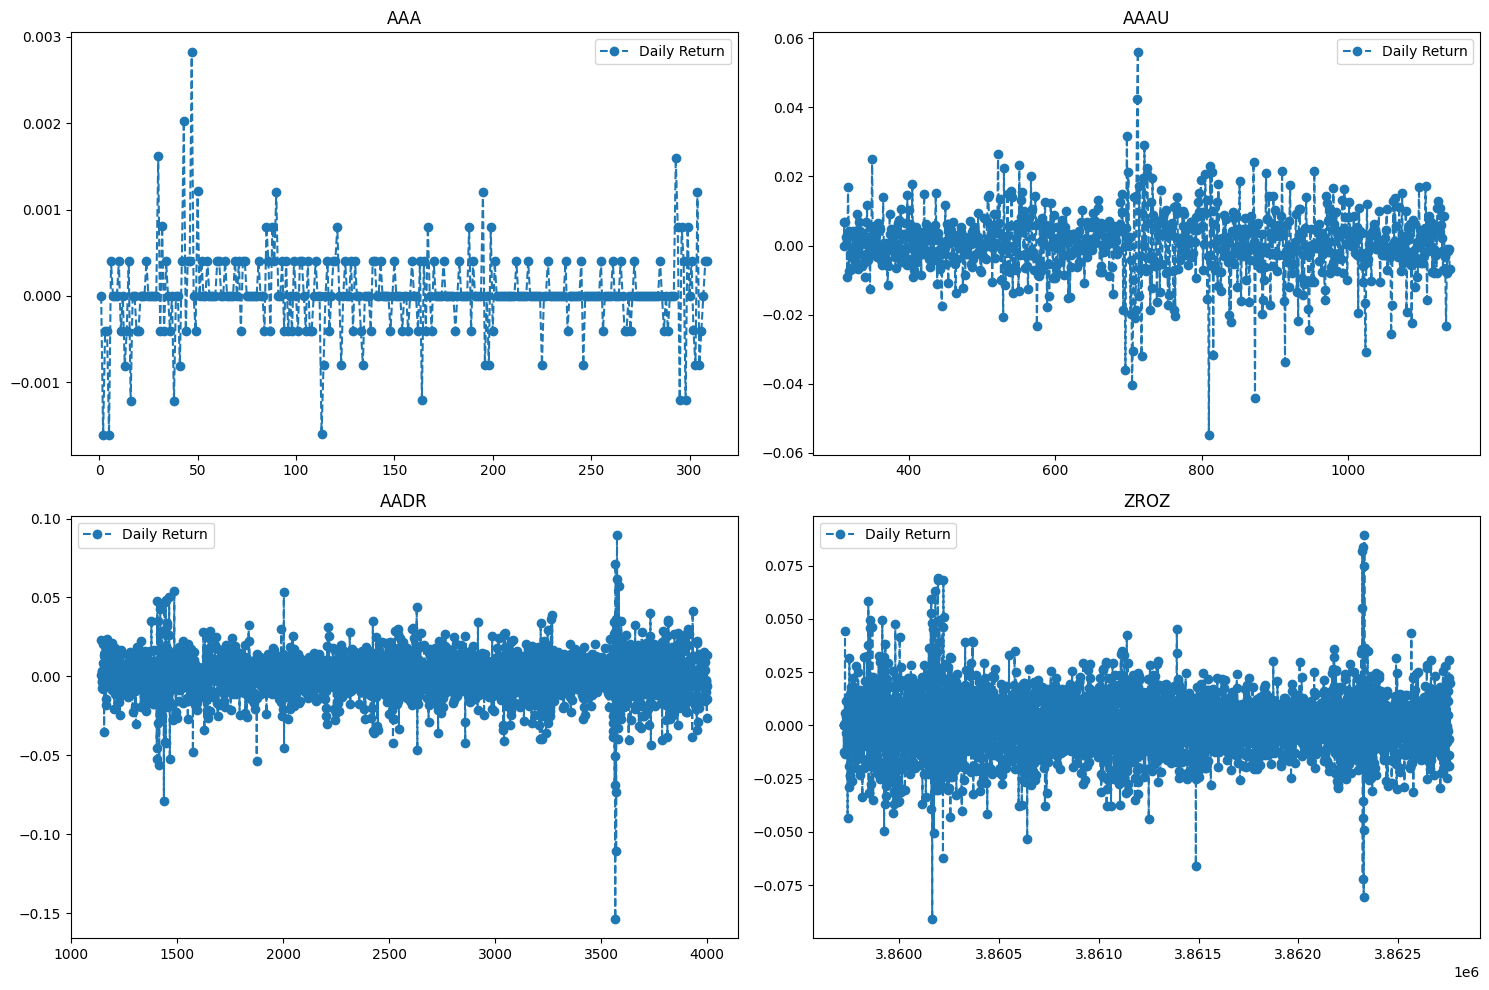

In [ ]:

# Create a dictionary to store each company's DataFrame
company_dfs = {}

# Calculate daily return and store in new DataFrames
for company in companies:
    selected = df[df['fund_symbol'] == company].copy()
    selected['Daily Return'] = selected['adj_close'].pct_change()
    company_dfs[company] = selected

# Plot daily return
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

for i, (company, data) in enumerate(company_dfs.items()):
    row = i // 2
    col = i % 2
    data['Daily Return'].plot(ax=axes[row, col], legend=True, linestyle='--', marker='o')
    axes[row, col].set_title(company)

plt.tight_layout()
plt.show()


In [ ]:
import seaborn as sns

# Create a new DataFrame to store the closing prices of each company
closing_prices = pd.DataFrame()

for company in companies:
    closing_prices[company] = df[df['fund_symbol'] == company]['close']

# Calculate the correlation matrix
corr_matrix = closing_prices.corr()
for company in companies:
    num_unique_prices = df[df['fund_symbol'] == company]['close'].nunique()
    print(f"{company} has {num_unique_prices} unique closing prices.")

# correlation matrix
print(corr_matrix)


AAA has 29 unique closing prices.
AAAU has 454 unique closing prices.
AADR has 1754 unique closing prices.
ZROZ has 2462 unique closing prices.
      AAA  AAAU  AADR  ZROZ
AAA   1.0   NaN   NaN   NaN
AAAU  NaN   NaN   NaN   NaN
AADR  NaN   NaN   NaN   NaN
ZROZ  NaN   NaN   NaN   NaN


In [ ]:
# Let's start by creating individual DataFrames for each company
dfs = [df[df['fund_symbol'] == company].set_index('price_date')[['close']].rename(columns={'close': company}) for company in companies]

# Merge these dataframes together based on index (date)
from functools import reduce
df_merged = reduce(lambda left,right: pd.merge(left,right, left_index=True, right_index=True, how='outer'), dfs)

# Now, calculate the correlation
corr_matrix = df_merged.corr()

# Print the correlation matrix
print(corr_matrix)


           AAA      AAAU      AADR      ZROZ
AAA   1.000000 -0.298929  0.256145 -0.294850
AAAU -0.298929  1.000000  0.716704  0.833319
AADR  0.256145  0.716704  1.000000  0.644179
ZROZ -0.294850  0.833319  0.644179  1.000000


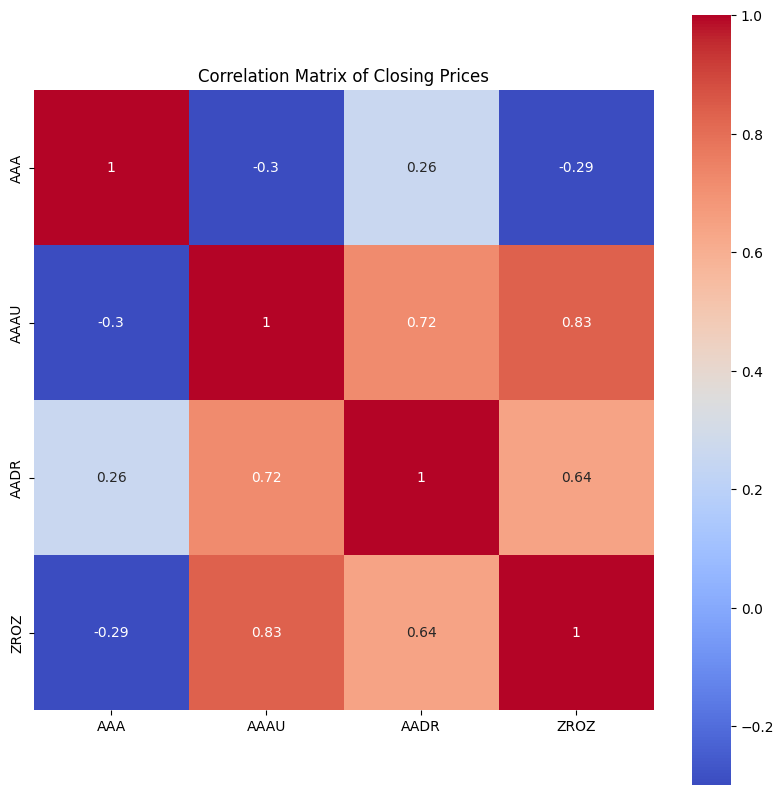

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Closing Prices')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
models = {}
metrics_dict = {}

for company in companies:
    print(f"\nProcessing {company}:")

    # We'll use 'open', 'high', 'low', 'volume' as our features
    X = df[df['fund_symbol'] == company][['open', 'high', 'low', 'volume']]
    y = df[df['fund_symbol'] == company]['close']

    # Split the data into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # Create and train the model
    regressor = LinearRegression()
    regressor.fit(X_train, y_train)

    # Save the model to the models dictionary
    models[company] = regressor

    # Do prediction on the test data
    y_pred = regressor.predict(X_test)

    # Evaluate the performance of the algorithm and save to the metrics dictionary
    metrics_dict[company] = {
        'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
        'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
        'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    }

    print(f"Mean Absolute Error: {metrics_dict[company]['Mean Absolute Error']}")
    print(f"Mean Squared Error: {metrics_dict[company]['Mean Squared Error']}")
    print(f"Root Mean Squared Error: {metrics_dict[company]['Root Mean Squared Error']}")

# The trained models for each company are now stored in the models dictionary,
# and you can use them for further predictions.



Processing AAA:
Mean Absolute Error: 0.0039544940033938965
Mean Squared Error: 3.6149601879389063e-05
Root Mean Squared Error: 0.006012453898317147

Processing AAAU:
Mean Absolute Error: 0.04299413942058785
Mean Squared Error: 0.004108058688761676
Root Mean Squared Error: 0.06409413926999626

Processing AADR:
Mean Absolute Error: 0.1082910035283159
Mean Squared Error: 0.06043153262796589
Root Mean Squared Error: 0.24582825839997705

Processing ZROZ:
Mean Absolute Error: 0.34980773707992946
Mean Squared Error: 0.27754729881298307
Root Mean Squared Error: 0.5268275797763279


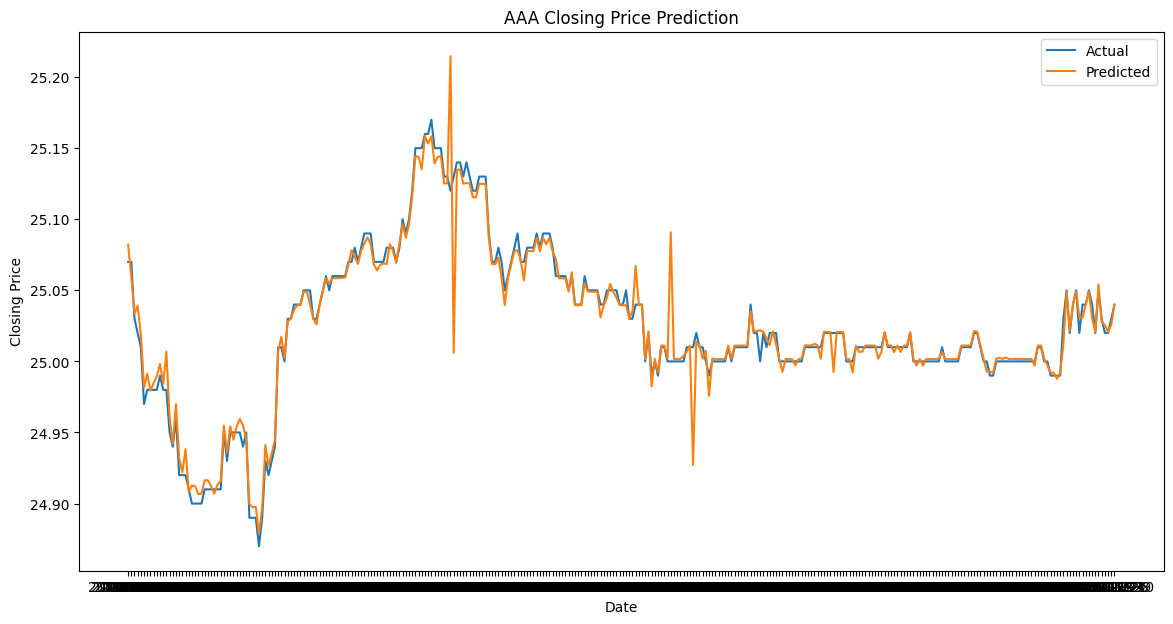

In [ ]:
import matplotlib.pyplot as plt

# Choose which company to visualize
company = 'AAA'  # replace with the company you're interested in

# Predict the closing prices using the entire dataset
X = df[df['fund_symbol'] == company][['open', 'high', 'low', 'volume']]
predicted_close = models[company].predict(X)

# Plot the actual and predicted closing prices
plt.figure(figsize=(14,7))
plt.plot(df[df['fund_symbol'] == company]['price_date'], df[df['fund_symbol'] == company]['close'], label='Actual')
plt.plot(df[df['fund_symbol'] == company]['price_date'], predicted_close, label='Predicted')
plt.title(f'{company} Closing Price Prediction')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np

# Function to convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # Input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # Put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Number of previous data points to use for prediction
look_back = 3

for company in companies:
    # Load dataset for a specific company
    dataset = df1[df1['fund_symbol'] == company][['close']].values.astype('float32')

    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    dataset = scaler.fit_transform(dataset)

    # Transform the time series data into supervised learning problem
    reframed = series_to_supervised(dataset, look_back, 1)

    # Split into train and test sets
    values = reframed.values
    n_train_days = int(len(values) * 0.8) # 80% of data used for training
    train = values[:n_train_days, :]
    test = values[n_train_days:, :]

    # Split into input and outputs
    train_X, train_y = train[:, :-1], train[:, -1]
    test_X, test_y = test[:, :-1], test[:, -1]

    # Reshape input to be 3D [samples, timesteps, features]
    train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
    test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

    # Design network
    model = Sequential()
    model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mae', optimizer='adam')

    # Fit network
    history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

    # Make a prediction
    yhat = model.predict(test_X)
    test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

    # Invert scaling for forecast
    inv_yhat = np.concatenate((yhat, test_X[:, 1:]), axis=1)
    inv_yhat = scaler.inverse_transform(inv_yhat)
    inv_yhat = inv_yhat[:,0]

    # Invert scaling for actual
    test_y = test_y.reshape((len(test_y), 1))
    inv_y = np.concatenate((test_y, test_X[:, 1:]), axis=1)
    inv_y = scaler.inverse_transform(inv_y)
    inv_y = inv_y[:,0]

    # Print some sample predictions
    print(f"Sample predictions for {company}:")
    for i in range(10):
        print(f"Predicted: {inv_yhat[i]}, Actual: {inv_y[i]}")


Epoch 1/50
4/4 - 3s - loss: 0.5191 - val_loss: 0.4457 - 3s/epoch - 695ms/step
Epoch 2/50
4/4 - 0s - loss: 0.4899 - val_loss: 0.4183 - 62ms/epoch - 15ms/step
Epoch 3/50
4/4 - 0s - loss: 0.4606 - val_loss: 0.3908 - 41ms/epoch - 10ms/step
Epoch 4/50
4/4 - 0s - loss: 0.4309 - val_loss: 0.3627 - 32ms/epoch - 8ms/step
Epoch 5/50
4/4 - 0s - loss: 0.4008 - val_loss: 0.3342 - 33ms/epoch - 8ms/step
Epoch 6/50
4/4 - 0s - loss: 0.3704 - val_loss: 0.3049 - 33ms/epoch - 8ms/step
Epoch 7/50
4/4 - 0s - loss: 0.3392 - val_loss: 0.2745 - 33ms/epoch - 8ms/step
Epoch 8/50
4/4 - 0s - loss: 0.3073 - val_loss: 0.2430 - 33ms/epoch - 8ms/step
Epoch 9/50
4/4 - 0s - loss: 0.2745 - val_loss: 0.2103 - 41ms/epoch - 10ms/step
Epoch 10/50
4/4 - 0s - loss: 0.2415 - val_loss: 0.1762 - 35ms/epoch - 9ms/step
Epoch 11/50
4/4 - 0s - loss: 0.2074 - val_loss: 0.1406 - 33ms/epoch - 8ms/step
Epoch 12/50
4/4 - 0s - loss: 0.1724 - val_loss: 0.1035 - 33ms/epoch - 8ms/step
Epoch 13/50
4/4 - 0s - loss: 0.1368 - val_loss: 0.0648 - 3

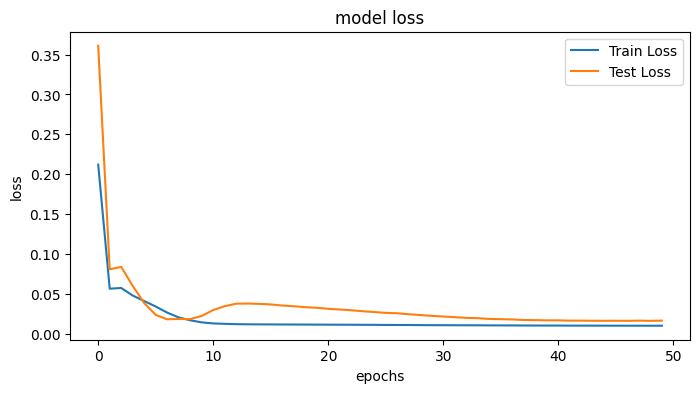

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')
plt.show();


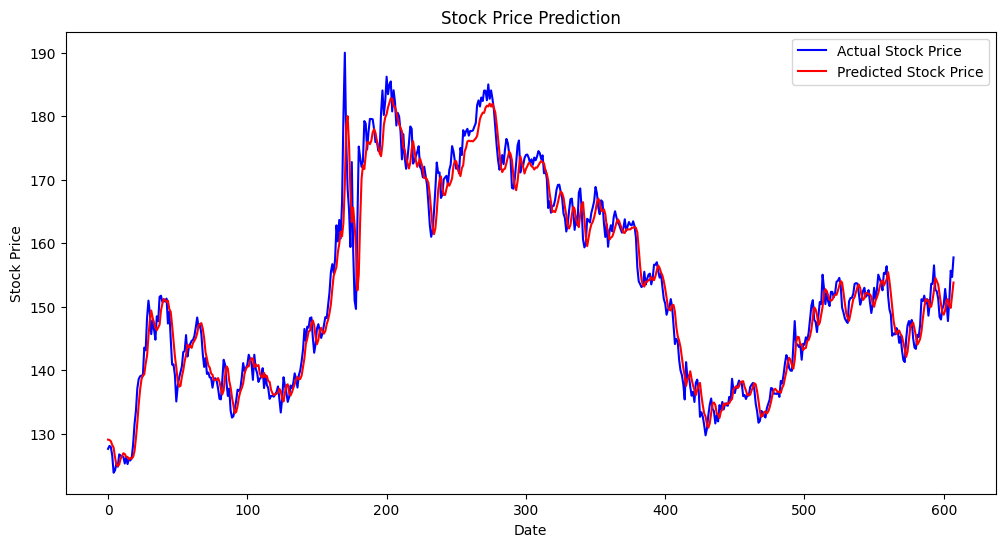

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(inv_y, color='blue', label='Actual Stock Price')
plt.plot(inv_yhat, color='red', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


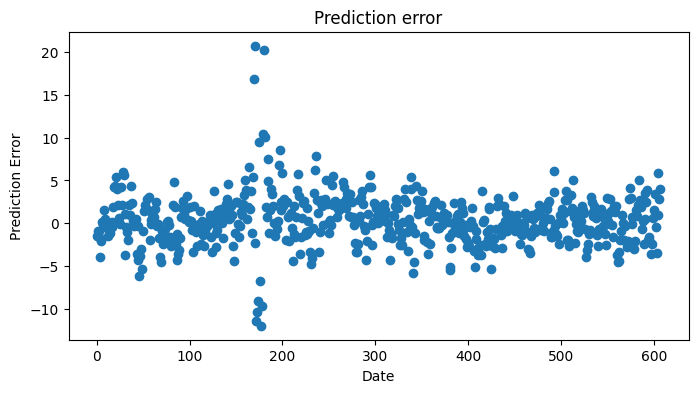

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(inv_y - inv_yhat, marker='o', linestyle='')
plt.title('Prediction error')
plt.xlabel('Date')
plt.ylabel('Prediction Error')
plt.show()



Processing AAA:
2/2 [==============================] - 1s 20ms/step
Root Mean Square Error: 0.019574028569717846


<ipython-input-24-90d4a8625363>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


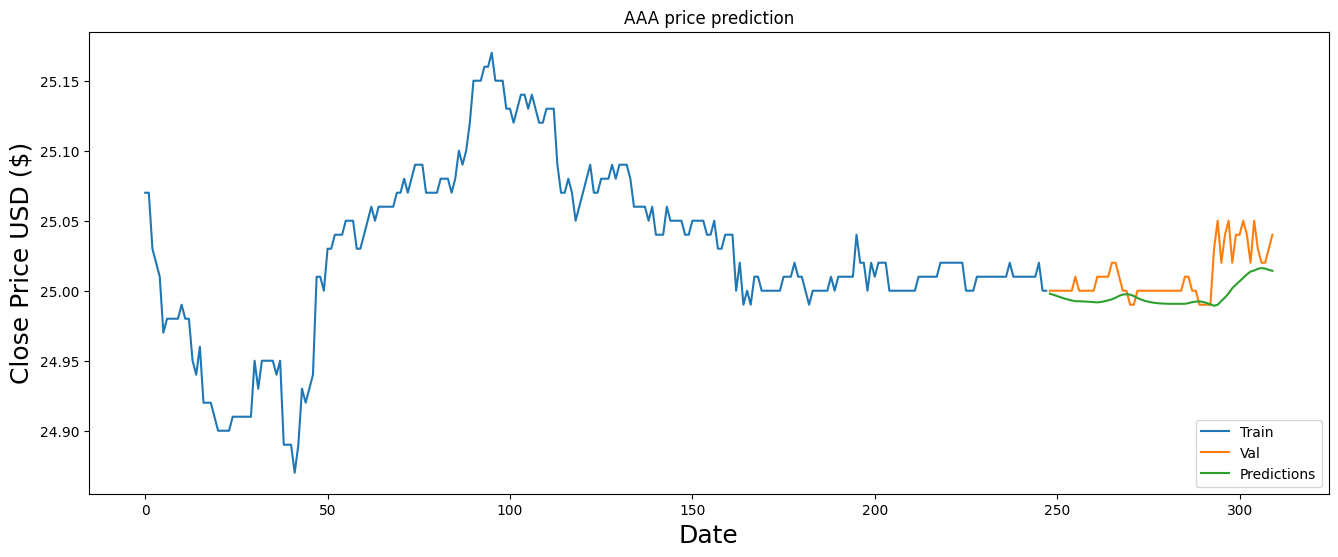


Processing AAAU:
6/6 [==============================] - 1s 17ms/step
Root Mean Square Error: 0.3219590917799448


<ipython-input-24-90d4a8625363>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


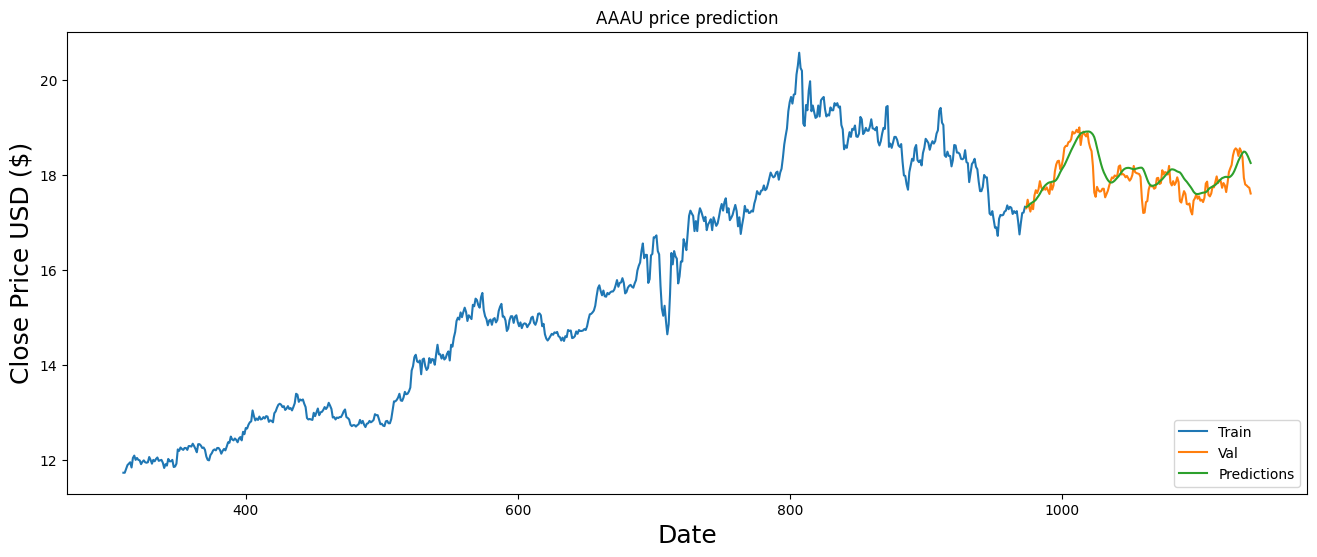


Processing AADR:
18/18 [==============================] - 2s 28ms/step
Root Mean Square Error: 1.7388746615318518


<ipython-input-24-90d4a8625363>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


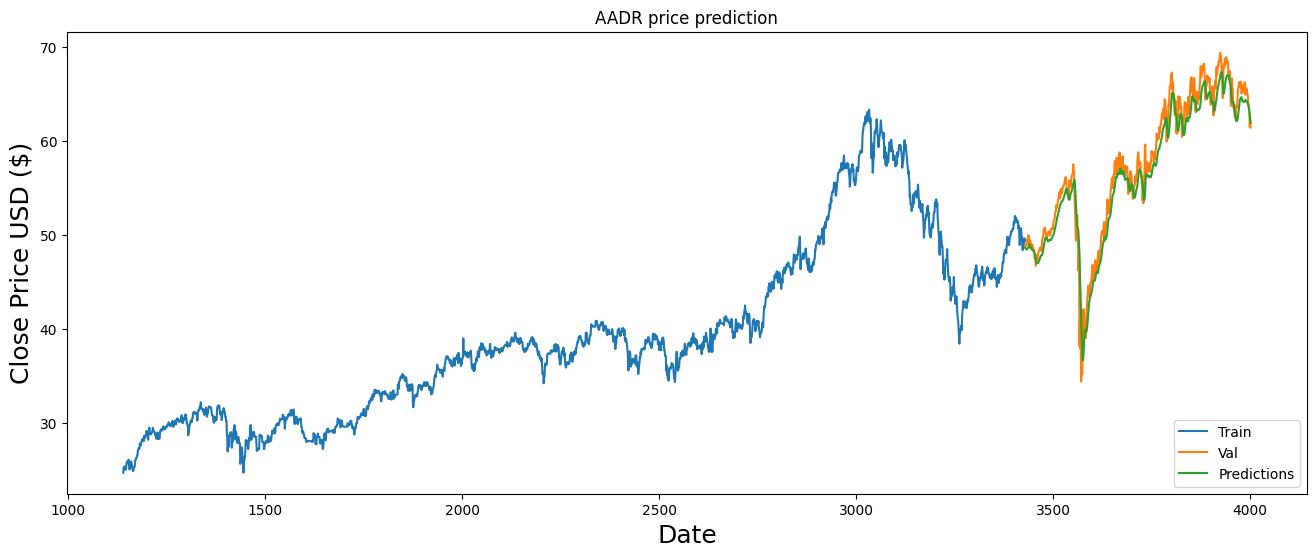


Processing ZROZ:
19/19 [==============================] - 1s 21ms/step
Root Mean Square Error: 5.149656289643573


<ipython-input-24-90d4a8625363>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


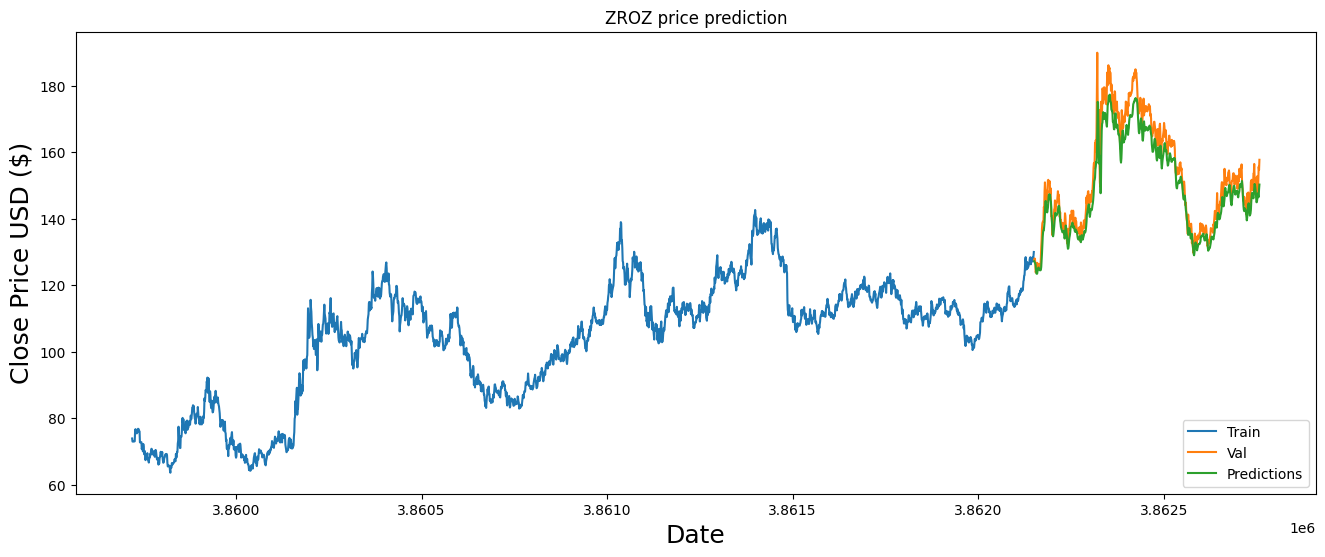

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

companies = ['AAA', 'AAAU', 'AADR', 'ZROZ']

for company in companies:
    print(f"\nProcessing {company}:")

    data = df[df['fund_symbol'] == company][['close']]
    dataset = data.values
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(dataset)

    train_data = scaled_data[0:int(len(dataset)*0.8), :]
    x_train=[]
    y_train = []
    for i in range(60,len(train_data)):
        x_train.append(train_data[i-60:i,0])
        y_train.append(train_data[i,0])

    x_train, y_train = np.array(x_train), np.array(y_train)

    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))

    model.compile(optimizer='adam', loss='mean_squared_error')

    model.fit(x_train, y_train, batch_size=1, epochs=1)

    test_data = scaled_data[int(len(dataset)*0.8) - 60: , :]
    x_test = []
    y_test =  dataset[int(len(dataset)*0.8) :, :]
    for i in range(60,len(test_data)):
        x_test.append(test_data[i-60:i,0])

    x_test = np.array(x_test)

    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    predictions = model.predict(x_test)
    predictions = scaler.inverse_transform(predictions)

    rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
    print(f"Root Mean Square Error: {rmse}")

    train = data[:int(len(dataset)*0.8)]
    valid = data[int(len(dataset)*0.8):]
    valid['Predictions'] = predictions

    plt.figure(figsize=(16,6))
    plt.title(f'{company} price prediction')
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Close Price USD ($)', fontsize=18)
    plt.plot(train['close'])
    plt.plot(valid[['close', 'Predictions']])
    plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
    plt.show()


2371/2371 [==============================] - 115s 48ms/step - loss: 3.4746e-04


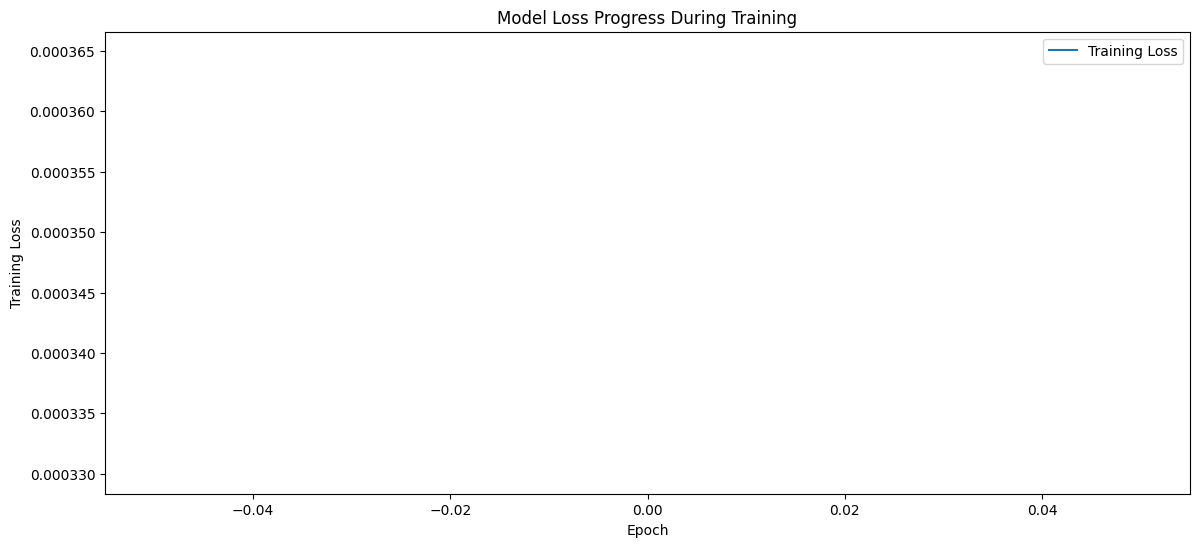

In [ ]:
...
# Add this before you start training your model
history = model.fit(x_train, y_train, batch_size=1, epochs=1)

# Plotting the loss over epochs
plt.figure(figsize=(14,6))
plt.plot(history.history['loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Loss')
plt.legend(['Training Loss'])


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
plt.figure(figsize=(14,6))
plt.plot(history.history['accuracy'])
plt.title('Model Accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training Accuracy')
plt.legend(['Training Accuracy'])


KeyError: ignored

<Figure size 1400x600 with 0 Axes>

<ipython-input-11-cf632377e8a7>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_date'] = pd.to_datetime(df['price_date'])


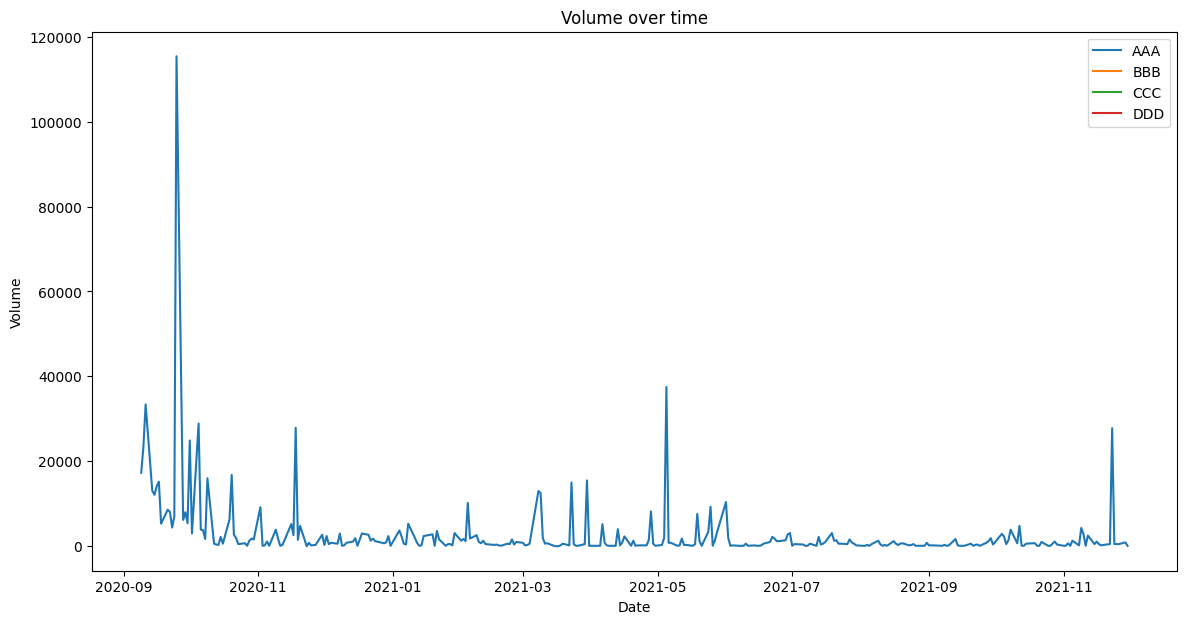

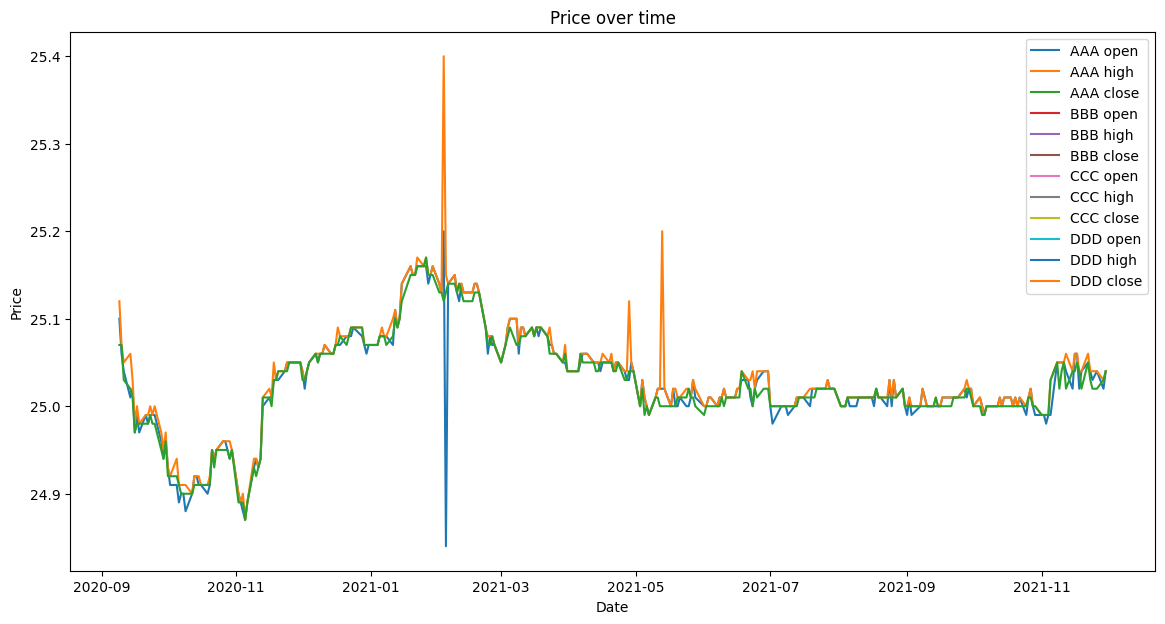

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter out data for the specific companies
companies = ['AAA', 'BBB', 'CCC', 'DDD']
df = df[df['fund_symbol'].isin(companies)]

# Set the date as index
df['price_date'] = pd.to_datetime(df['price_date'])
df = df.set_index('price_date')

# For volume
plt.figure(figsize=(14,7))
for company in companies:
    selected = df[df['fund_symbol'] == company]
    plt.plot(selected['volume'], label=company)
plt.title('Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# For open, high, close prices
plt.figure(figsize=(14,7))
for company in companies:
    selected = df[df['fund_symbol'] == company]
    for column in ['open', 'high', 'close']:
        plt.plot(selected[column], label=f"{company} {column}")
plt.title('Price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


,fund_symbol,open,high,low,close,adj_close,volume
price_date,,,,,,,
2021-09-21,AAA,25.01,25.01,25.00,25.00,25.00,100
2021-09-22,AAA,25.01,25.01,25.01,25.01,25.01,300
2021-09-23,AAA,25.01,25.01,25.01,25.01,25.01,400
2021-09-24,AAA,25.01,25.01,25.01,25.01,25.01,100
2021-09-27,AAA,25.02,25.02,25.01,25.01,25.01,800
2021-09-28,AAA,25.01,25.03,25.01,25.02,25.02,1200
2021-09-29,AAA,25.02,25.02,25.02,25.02,25.02,1900
2021-09-30,AAA,25.02,25.02,25.01,25.01,25.01,400
2021-10-01,AAA,25.00,25.00,25.00,25.00,25.00,1000


fund_symbol    0
price_date     0
open           0
high           0
low            0
close          0
adj_close      0
volume         0
dtype: int64
fund_symbol     object
price_date      object
open           float64
high           float64
low            float64
close          float64
adj_close      float64
volume           int64
dtype: object


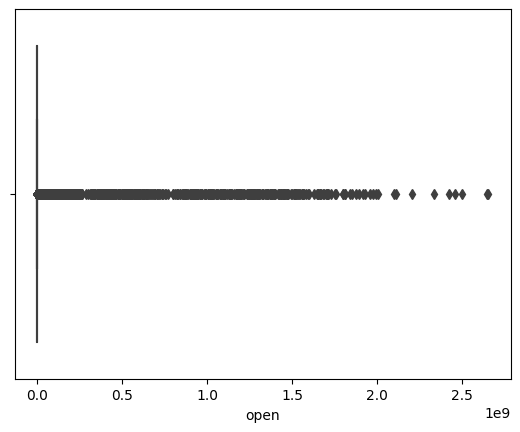

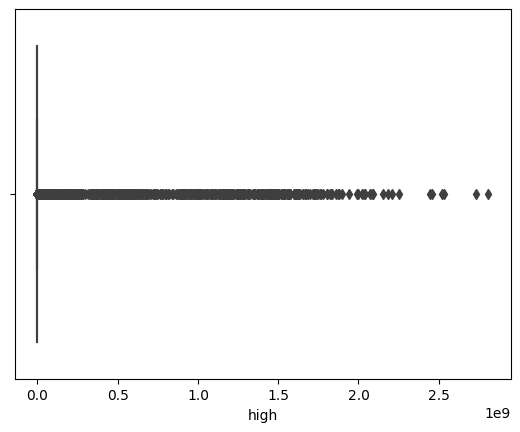

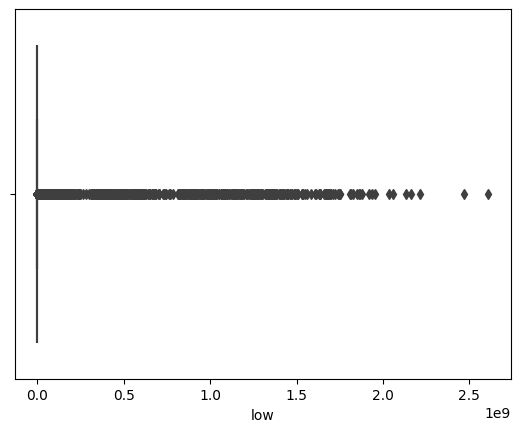

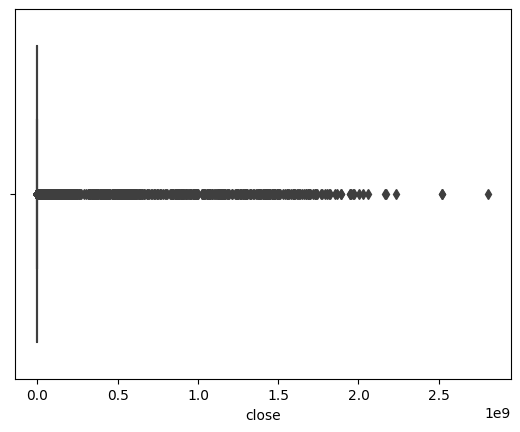

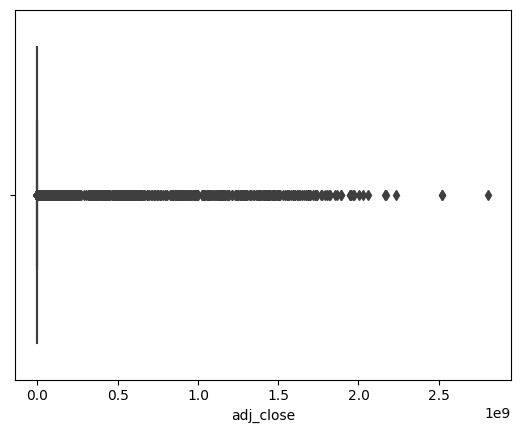

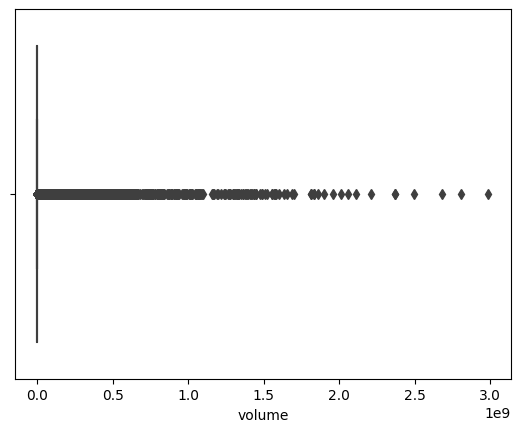

In [ ]:
# Convert index to datetime if it's not already
df1.index = pd.to_datetime(df1.index)

# Check for missing values
print(df1.isnull().sum())

# Remove duplicates
df1 = df1[~df1.duplicated()]

# Check data types
print(df1.dtypes)

# Check for outliers
import seaborn as sns
import matplotlib.pyplot as plt

for column in ['open', 'high', 'low', 'close', 'adj_close', 'volume']:
    sns.boxplot(x=df1[column])
    plt.show()

In [ ]:
df1.index = pd.to_datetime(df1.index)

In [ ]:
print(df1.isnull().sum())

fund_symbol    0
price_date     0
open           0
high           0
low            0
close          0
adj_close      0
volume         0
dtype: int64


In [ ]:
df1 = df1[~df1.duplicated()]

In [ ]:
# Check data types
print(df1.dtypes)

fund_symbol     object
price_date      object
open           float64
high           float64
low            float64
close          float64
adj_close      float64
volume           int64
dtype: object


In [ ]:
df1.describe()

,open,high,low,close,adj_close,volume
count,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06,3.866030e+06
mean,1.202537e+05,1.262811e+05,1.149734e+05,1.196726e+05,1.196579e+05,1.026745e+06
std,1.149917e+07,1.208270e+07,1.097204e+07,1.143655e+07,1.143655e+07,1.275733e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.486000e+01,2.494000e+01,2.476000e+01,2.485000e+01,2.229000e+01,3.553000e+03
50%,3.388000e+01,3.406000e+01,3.368000e+01,3.387000e+01,3.108000e+01,2.133900e+04
75%,5.417000e+01,5.441000e+01,5.390000e+01,5.416000e+01,5.007000e+01,1.269000e+05
max,2.656750e+09,2.808750e+09,2.609750e+09,2.808750e+09,2.808750e+09,2.987062e+09


In [ ]:
df1.count()

fund_symbol    3866030
price_date     3866030
open           3866030
high           3866030
low            3866030
close          3866030
adj_close      3866030
volume         3866030
dtype: int64

In [ ]:
len(df1.isnull().sum())

8

In [ ]:
df1.value_counts()

fund_symbol  price_date  open   high   low    close  adj_close  volume
AAA          2020-09-09  25.10  25.12  25.07  25.07  24.85      17300     1
PRN          2015-09-11  43.49  44.01  43.48  44.01  43.01      35100     1
             2015-08-25  43.16  43.16  41.62  41.78  40.83      46900     1
             2015-08-26  42.99  43.26  41.81  42.79  41.82      37500     1
             2015-08-27  43.28  44.13  43.23  44.00  43.00      91200     1
                                                                         ..
FVD          2016-08-15  27.50  27.55  27.43  27.45  24.49      430800    1
             2016-08-16  27.43  27.43  27.25  27.26  24.32      367800    1
             2016-08-17  27.29  27.37  27.13  27.35  24.40      549200    1
             2016-08-18  27.36  27.50  27.36  27.50  24.54      362800    1
ZSL          2021-11-30  28.15  28.73  25.91  28.49  28.49      219400    1
Length: 3866030, dtype: int64

In [ ]:
df1

,fund_symbol,price_date,open,high,low,close,adj_close,volume
1970-01-01 00:00:00.000000000,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1970-01-01 00:00:00.000000001,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
1970-01-01 00:00:00.000000002,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
1970-01-01 00:00:00.000000003,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
1970-01-01 00:00:00.000000004,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
1970-01-01 00:00:00.003866025,ZSL,2021-11-23,26.81,27.21,26.30,26.35,26.35,190900
1970-01-01 00:00:00.003866026,ZSL,2021-11-24,26.79,26.96,26.57,26.69,26.69,109000
1970-01-01 00:00:00.003866027,ZSL,2021-11-26,26.67,28.14,26.67,27.72,27.72,205500
1970-01-01 00:00:00.003866028,ZSL,2021-11-29,27.89,28.56,27.80,28.27,28.27,411900


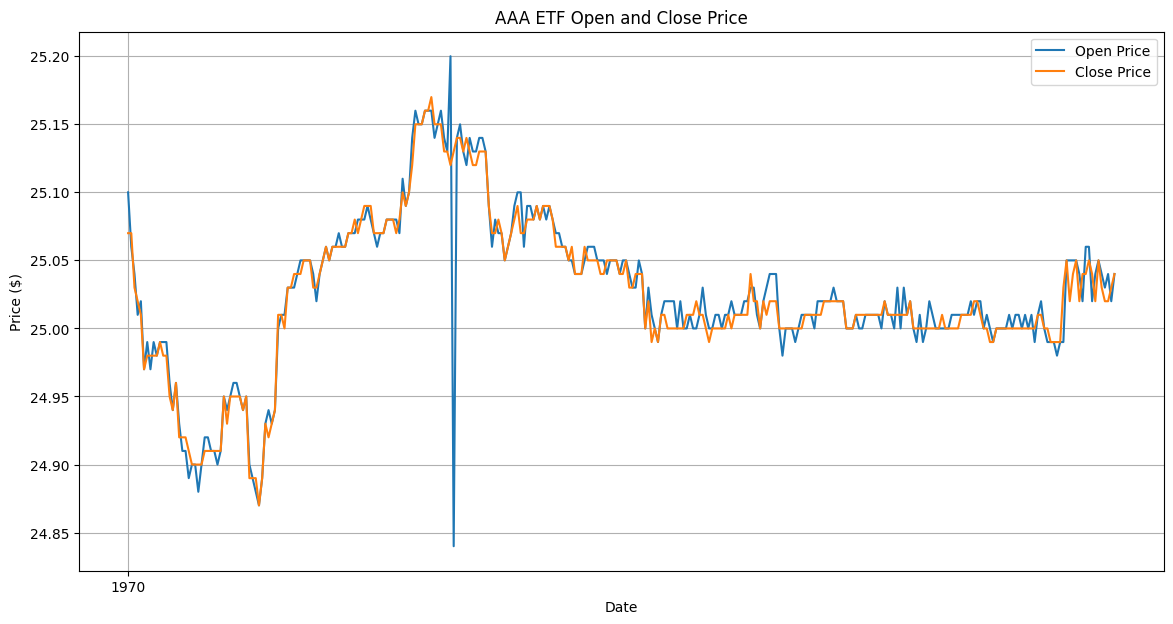

In [ ]:
# Filter the dataframe for 'AAA'
df_AAA = df1[df1['fund_symbol'] == 'AAA']

# Plotting the 'open' and 'close' prices
plt.figure(figsize=(14,7))
plt.plot(df_AAA['open'], label='Open Price')
plt.plot(df_AAA['close'], label='Close Price')
plt.title('AAA ETF Open and Close Price')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.legend(loc='best')
plt.grid(True)
plt.show()

In [ ]:
num_unique_symbols = df1['fund_symbol'].nunique()
print(f"There are {num_unique_symbols} unique fund symbols.")

There are 2310 unique fund symbols.


In [ ]:
len(df1)

3866030

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt



# Filter out data for the specific companies
companies = ['AAA', 'BBB', 'CCC', 'DDD']
df = df[df['fund_symbol'].isin(companies)]

# Set the date as index
df['price_date'] = pd.to_datetime(df['price_date'])
df = df.set_index('price_date')

# For volume
plt.figure(figsize=(14,7))
for company in companies:
    selected = df[df['fund_symbol'] == company]
    plt.plot(selected['volume'], label=company)
plt.title('Volume over time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

# For open, high, close prices
plt.figure(figsize=(14,7))
for company in companies:
    selected = df[df['fund_symbol'] == company]
    for column in ['open', 'high', 'close']:
        plt.plot(selected[column], label=f"{company} {column}")
plt.title('Price over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


NameError: ignored

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
import numpy as np

In [ ]:
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Numerically encode fund_symbol
le = preprocessing.LabelEncoder()
df1['symbol'] = le.fit_transform(df1['fund_symbol'])

# Select and normalize the features
features = ['symbol', 'open', 'high', 'low', 'close', 'adj_close', 'volume']
scaler = preprocessing.MinMaxScaler()
df1[features] = scaler.fit_transform(df1[features])

# Define a function to process the data for LSTM
def processData(data, lb):
    X, Y = [], []
    for i in range(len(data) - lb - 1):
        X.append(data[i: (i + lb)])
        Y.append(data[(i + lb), -2])  # -2 because close price is second last column now
    return np.array(X), np.array(Y)

# Lookback period
lb = 7

# Process the data
X, y = processData(df1[features].values, lb)

# Train test split
split = int(len(df1) * 0.7)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Reshape the data for LSTM
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], len(features)))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], len(features)))

# Define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(lb, len(features))))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# Train the model



In [ ]:
# Save the entire model to a file
model.save('model_output.h5')

In [ ]:
history = model.fit(X_train, y_train, epochs=5, batch_size= 128, validation_data=(X_test, y_test), shuffle=False)

Epoch 1/5
   65/21143 [..............................] - ETA: 16:19 - loss: 7.3649e-06

KeyboardInterrupt: ignored

In [ ]:
# Save the entire model to a file
model.save('model_output.h5')

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_summary.png', show_shapes=True)

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Test RMSE: %.3f' % rmse)

36244/36244 [==============================] - 192s 5ms/step


NameError: ignored

36244/36244 [==============================] - 205s 6ms/step


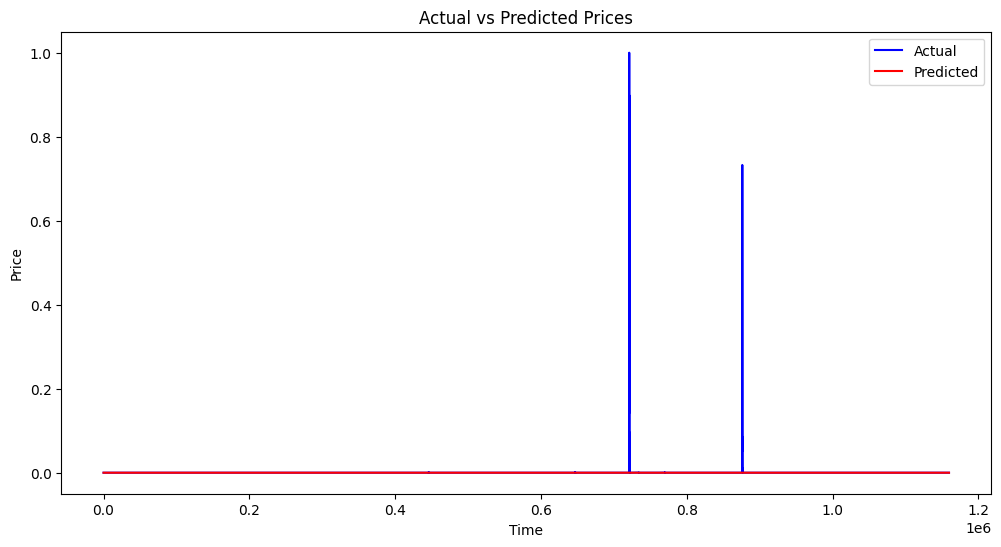

In [ ]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Plotting actual vs predicted prices
plt.figure(figsize=(12,6))
plt.plot(y_test, color='blue', label='Actual')
plt.plot(y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend(loc='upper right')
plt.show()


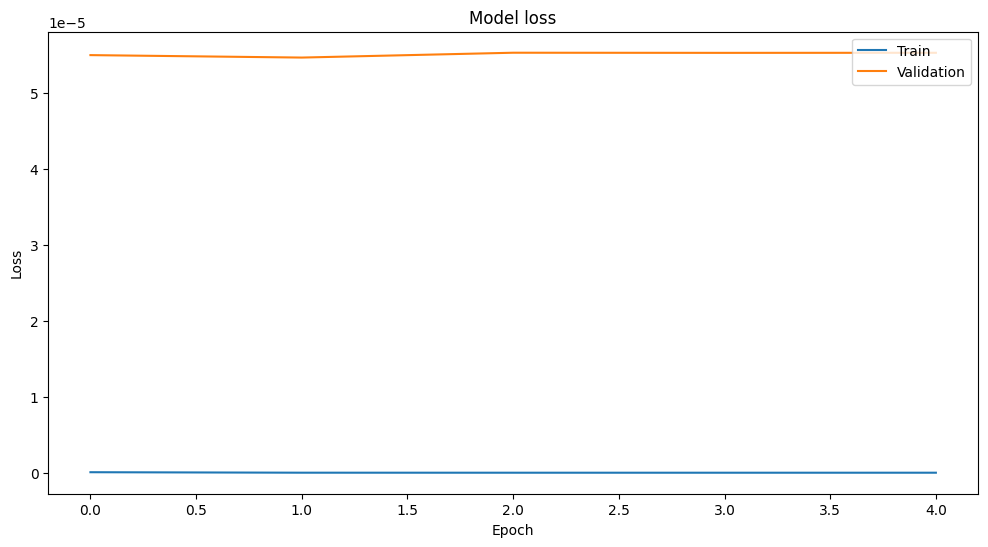

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


In [ ]:
import pandas as pd


In [ ]:
etf1 = pd.read_csv('/content/ETF prices.csv')

In [ ]:
etf2 = pd.read_csv('/content/ETFs.csv')

In [ ]:
len(etf1)

3866030

In [ ]:
len(etf2)

2310

In [ ]:
etf1

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
3866025,ZSL,2021-11-23,26.81,27.21,26.30,26.35,26.35,190900
3866026,ZSL,2021-11-24,26.79,26.96,26.57,26.69,26.69,109000
3866027,ZSL,2021-11-26,26.67,28.14,26.67,27.72,27.72,205500
3866028,ZSL,2021-11-29,27.89,28.56,27.80,28.27,28.27,411900


In [ ]:
etf2

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [ ]:
etf1.columns

Index(['fund_symbol', 'price_date', 'open', 'high', 'low', 'close',
       'adj_close', 'volume'],
      dtype='object')

In [ ]:
etf1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3866030 entries, 0 to 3866029
Data columns (total 8 columns):
 #   Column       Dtype  
---  ------       -----  
 0   fund_symbol  object 
 1   price_date   object 
 2   open         float64
 3   high         float64
 4   low          float64
 5   close        float64
 6   adj_close    float64
 7   volume       int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 236.0+ MB


In [ ]:
etf2.columns

Index(['fund_symbol', 'quote_type', 'region', 'fund_short_name',
       'fund_long_name', 'currency', 'fund_category', 'fund_family',
       'exchange_code', 'exchange_name',
       ...
       'fund_stdev_5years', 'fund_sharpe_ratio_5years',
       'fund_treynor_ratio_5years', 'fund_alpha_10years', 'fund_beta_10years',
       'fund_mean_annual_return_10years', 'fund_r_squared_10years',
       'fund_stdev_10years', 'fund_sharpe_ratio_10years',
       'fund_treynor_ratio_10years'],
      dtype='object', length=142)

In [ ]:
etf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2310 entries, 0 to 2309
Columns: 142 entries, fund_symbol to fund_treynor_ratio_10years
dtypes: float64(124), int64(1), object(17)
memory usage: 2.5+ MB


<Axes: >

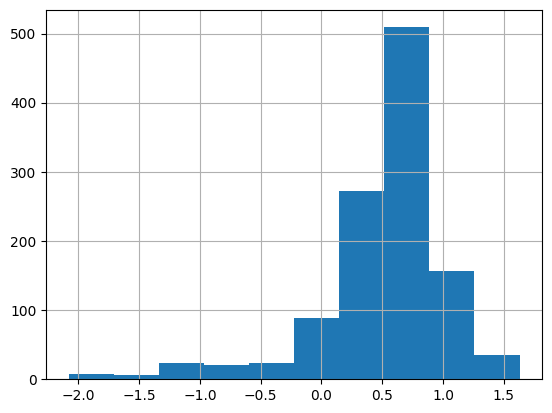

In [ ]:
etf2['fund_sharpe_ratio_5years'].hist()

In [ ]:
etf1

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100
...,...,...,...,...,...,...,...,...
3866025,ZSL,2021-11-23,26.81,27.21,26.30,26.35,26.35,190900
3866026,ZSL,2021-11-24,26.79,26.96,26.57,26.69,26.69,109000
3866027,ZSL,2021-11-26,26.67,28.14,26.67,27.72,27.72,205500
3866028,ZSL,2021-11-29,27.89,28.56,27.80,28.27,28.27,411900


               open      high       low     close  adj_close    volume
open       1.000000  0.998856  0.999147  0.997609   0.997609 -0.000841
high       0.998856  1.000000  0.998772  0.998910   0.998910 -0.000841
low        0.999147  0.998772  1.000000  0.998906   0.998906 -0.000843
close      0.997609  0.998910  0.998906  1.000000   1.000000 -0.000842
adj_close  0.997609  0.998910  0.998906  1.000000   1.000000 -0.000842
volume    -0.000841 -0.000841 -0.000843 -0.000842  -0.000842  1.000000


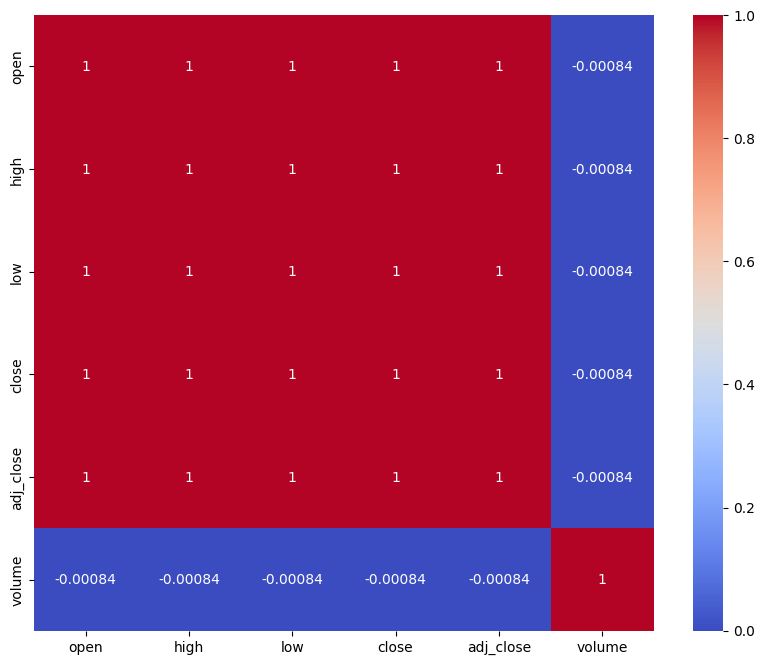

In [ ]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


etf1['price_date'] = pd.to_datetime(etf1['price_date'])

# drop non-numeric columns for the correlation matrix
numeric_df = etf1.drop(['fund_symbol', 'price_date'], axis=1)

# create the correlation matrix
corr_matrix = numeric_df.corr()

# print the correlation matrix
print(corr_matrix)

# plot the correlation matrix using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


<ipython-input-39-51180cae855c>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<ipython-input-39-51180cae855c>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


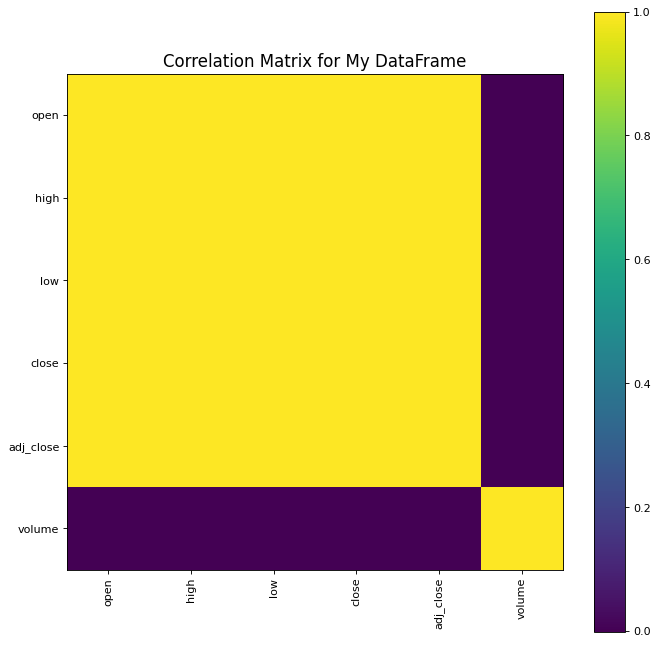

In [ ]:
import pandas as pd

# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "My DataFrame"
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


# call the function to plot correlation matrix
plotCorrelationMatrix(etf1, 10)


<ipython-input-40-a23776d1a309>:6: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')
<ipython-input-40-a23776d1a309>:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


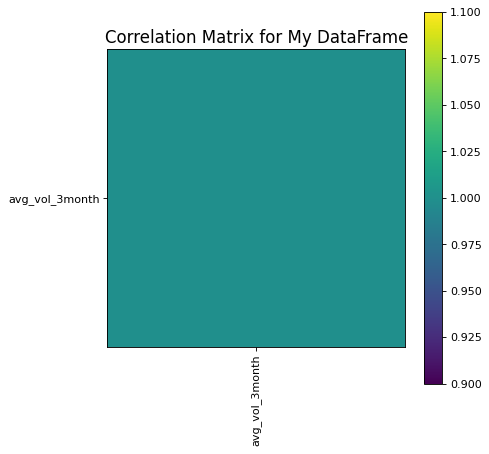

In [ ]:
import pandas as pd

# function to plot correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = "My DataFrame"
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]]
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


plotCorrelationMatrix(etf2, 6)


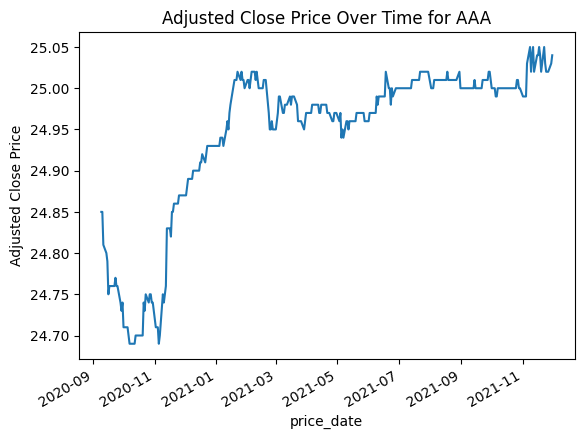

In [ ]:
etf1[etf1['fund_symbol']=='AAA'].set_index('price_date')['adj_close'].plot()
plt.title('Adjusted Close Price Over Time for AAA')
plt.ylabel('Adjusted Close Price')
plt.show()


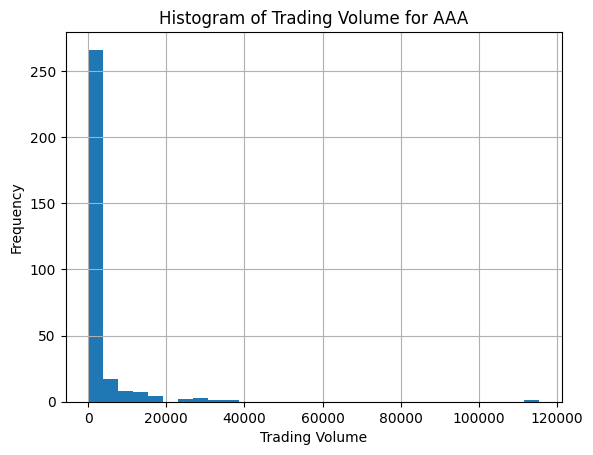

In [ ]:
etf1[etf1['fund_symbol']=='AAA']['volume'].hist(bins=30)
plt.title('Histogram of Trading Volume for AAA')
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.show()


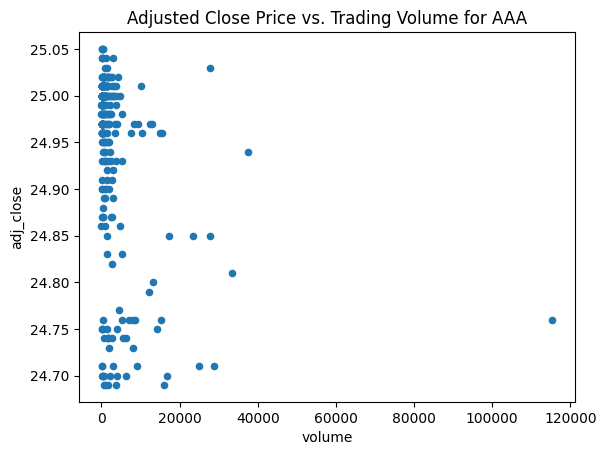

In [ ]:
etf1[etf1['fund_symbol']=='AAA'].plot(kind='scatter',x='volume',y='adj_close')
plt.title('Adjusted Close Price vs. Trading Volume for AAA')
plt.show()


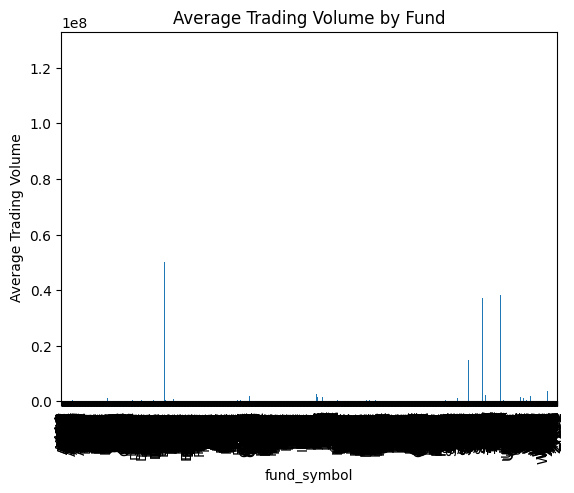

In [ ]:
etf1.groupby('fund_symbol')['volume'].mean().plot(kind='bar')
plt.title('Average Trading Volume by Fund')
plt.ylabel('Average Trading Volume')
plt.show()


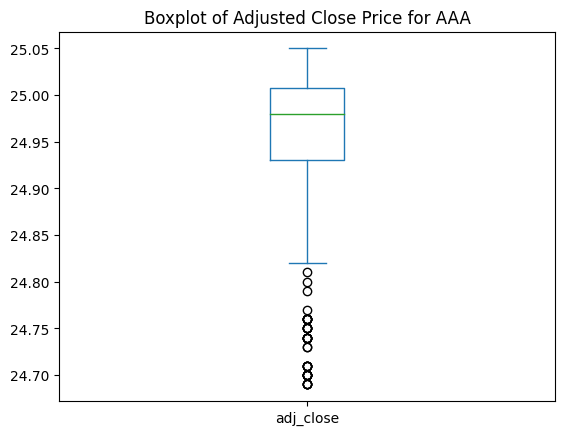

In [ ]:
etf1[etf1['fund_symbol']=='AAA']['adj_close'].plot(kind='box')
plt.title('Boxplot of Adjusted Close Price for AAA')
plt.show()


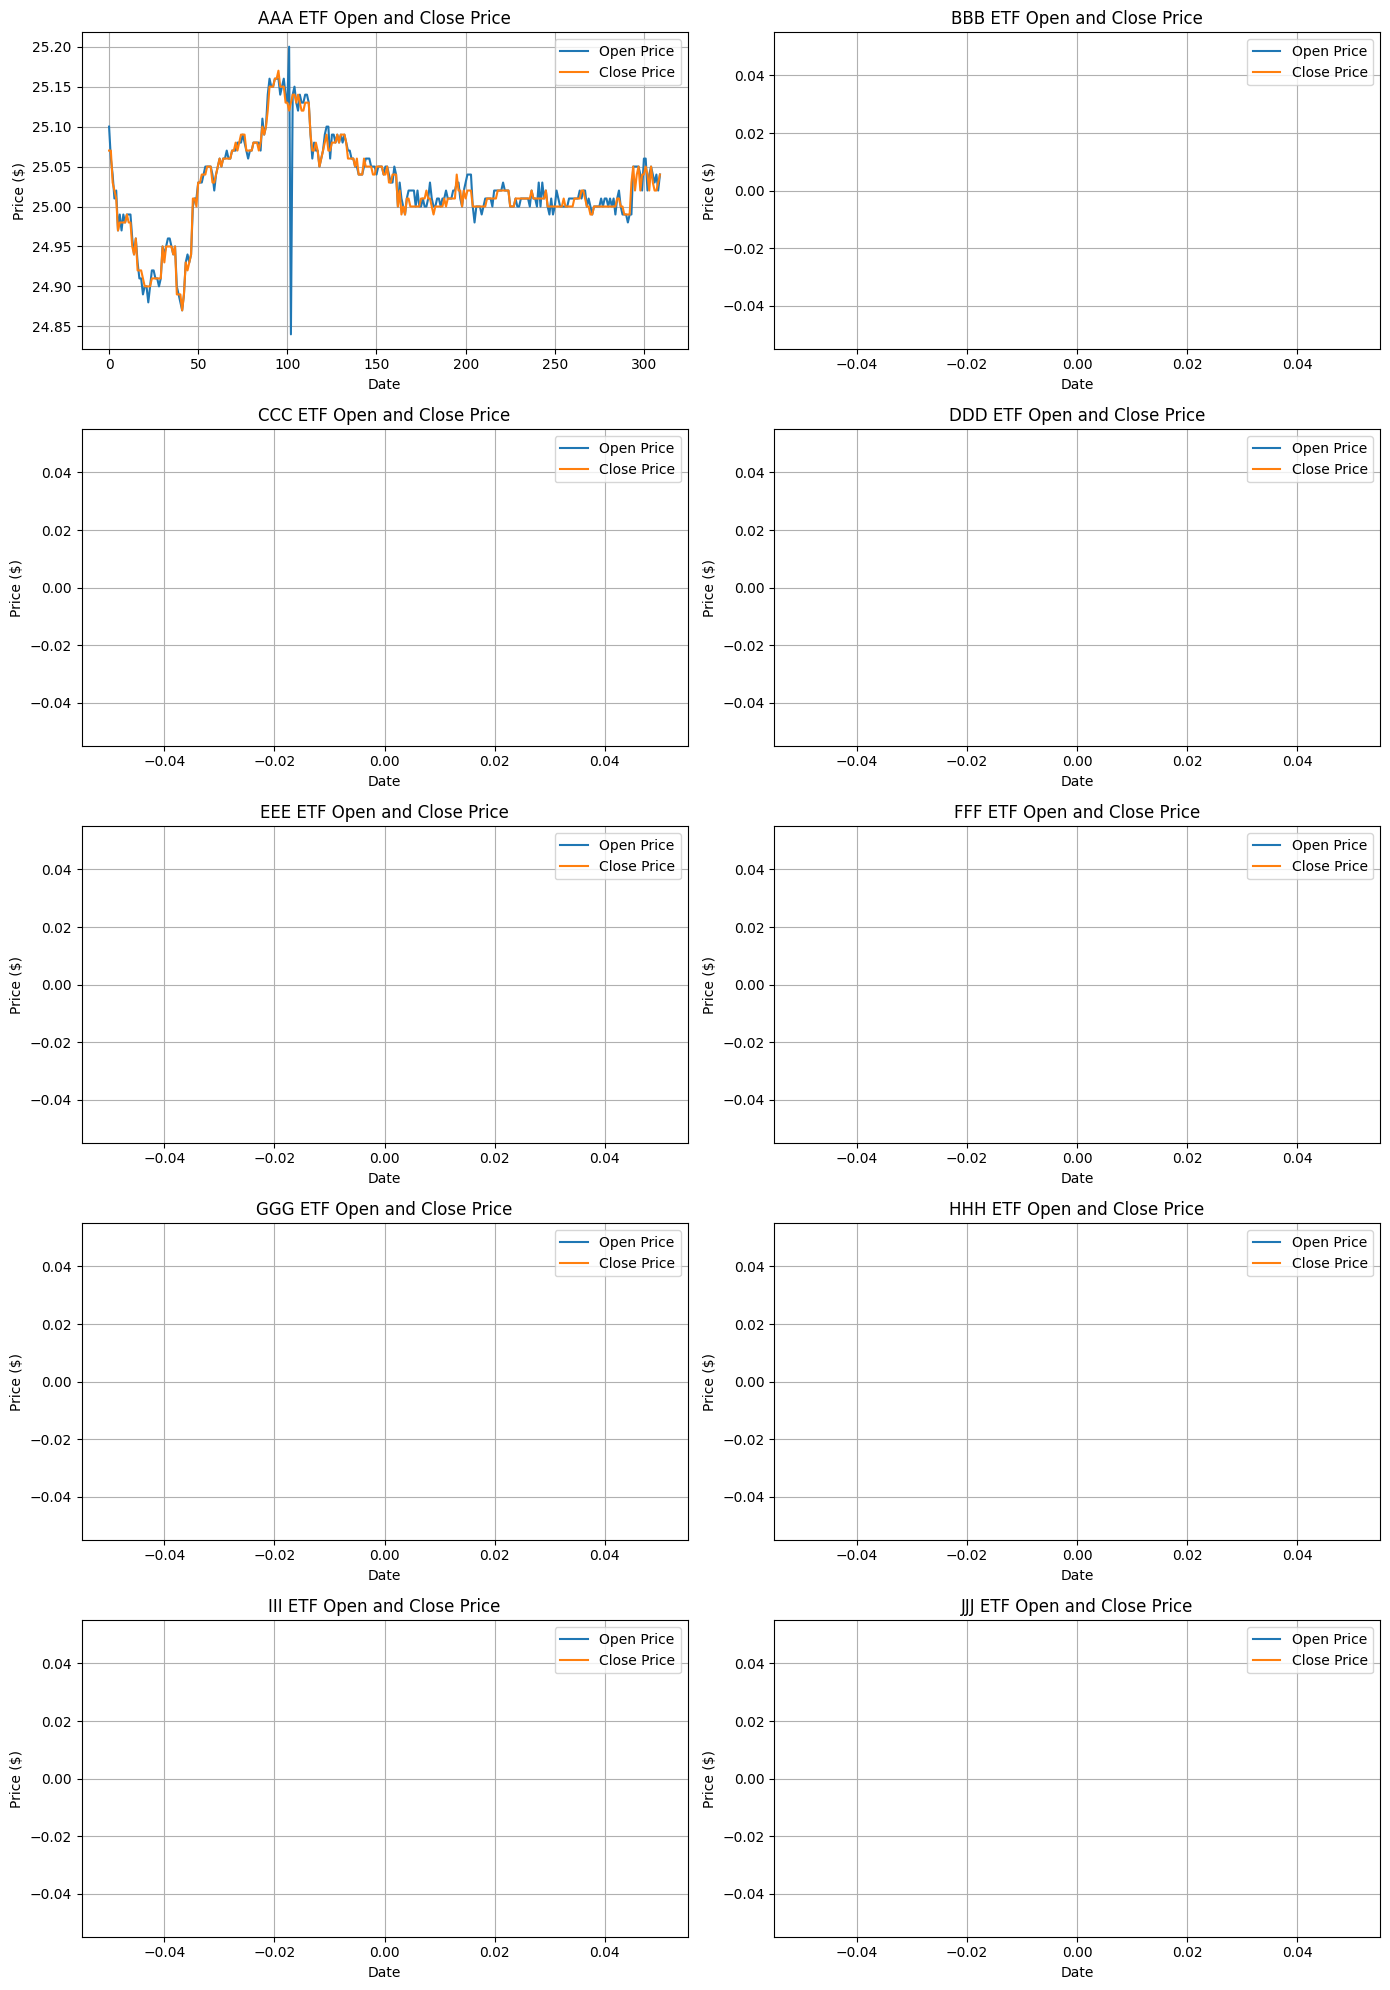

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's say you have these 10 fund symbols
fund_symbols = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG', 'HHH', 'III', 'JJJ']

# Set up the figure and subplots
fig, axs = plt.subplots(5, 2, figsize=(14, 20))
axs = axs.ravel()  # This is to make it easier to iterate over the subplots

for i, fund_symbol in enumerate(fund_symbols):
    # Filter the dataframe for the current fund symbol
    df_filtered = etf1[etf1['fund_symbol'] == fund_symbol]

    # Plotting the 'open' and 'close' prices on the i-th subplot
    axs[i].plot(df_filtered['open'], label='Open Price')
    axs[i].plot(df_filtered['close'], label='Close Price')
    axs[i].set_title(f'{fund_symbol} ETF Open and Close Price')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price ($)')
    axs[i].legend(loc='best')
    axs[i].grid(True)

# Automatically adjust subplot params so that the subplotS fits into the figure area.
plt.tight_layout()
# Display the figure.
plt.show()


In [ ]:
etf1['fund_symbol'].unique()

array(['AAA', 'AAAU', 'AADR', ..., 'ZIVZF', 'ZROZ', 'ZSL'], dtype=object)

In [ ]:
unique_symbols = etf1['fund_symbol'].unique()[:10]


In [ ]:
unique_symbols_list = list(etf1['fund_symbol'].unique()[:10])


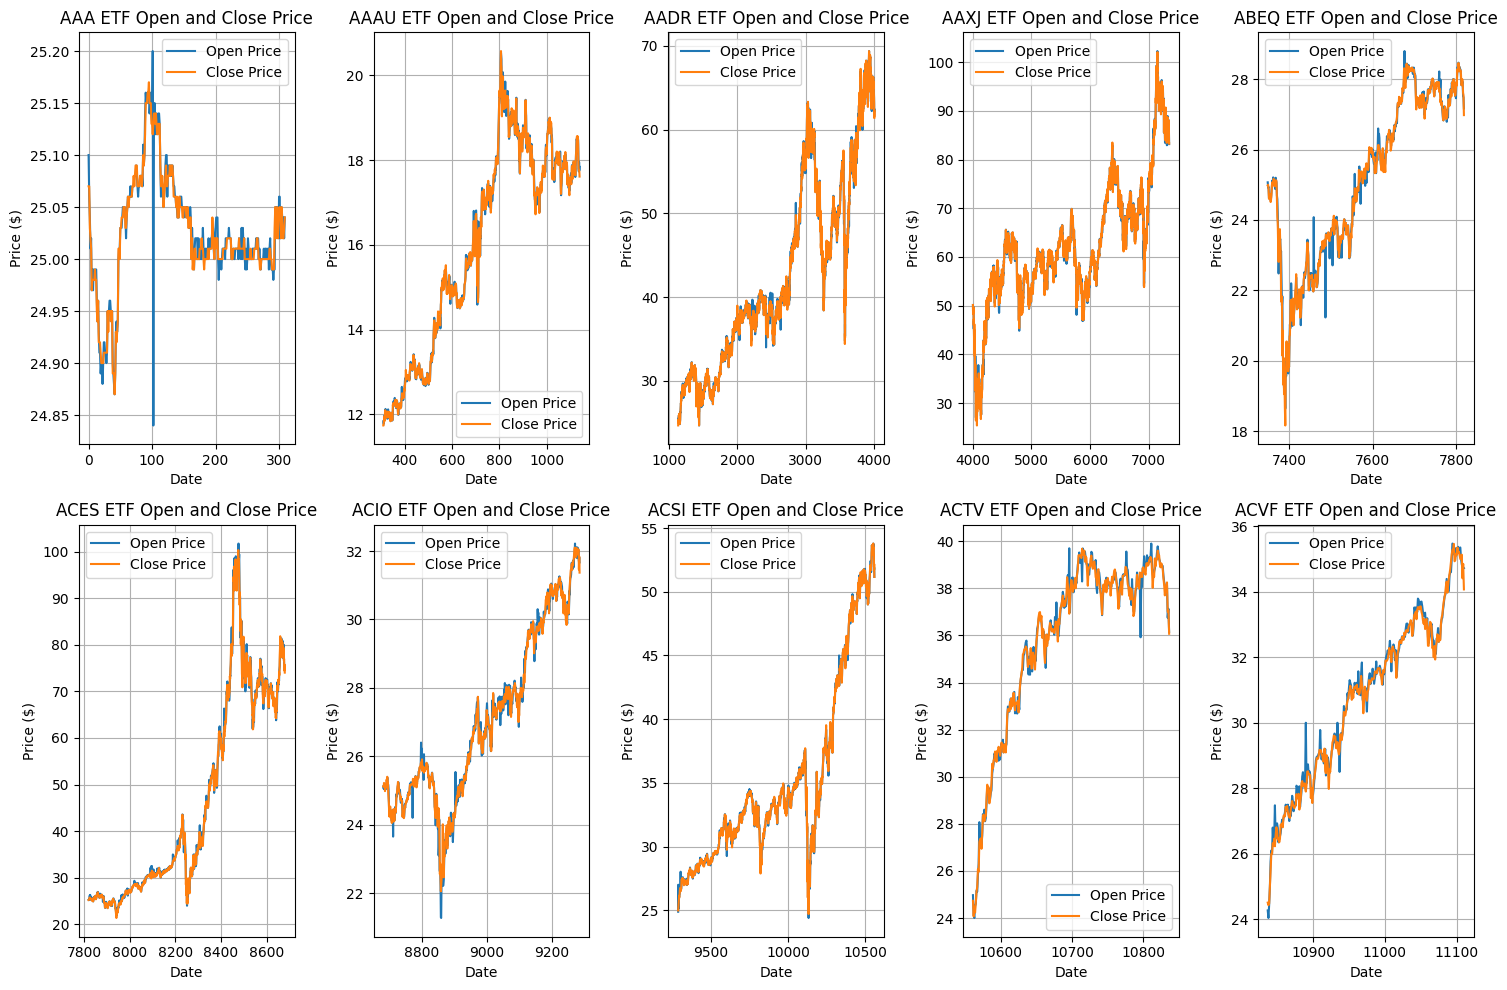

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Let's say you have these 10 fund symbols
# fund_symbols = ['AAA', 'BBB', 'CCC', 'DDD', 'EEE', 'FFF', 'GGG', 'HHH', 'III', 'JJJ']

# Set up the figure and subplots
fig, axs = plt.subplots(2, 5, figsize=(15, 10))
axs = axs.ravel()  # This is to make it easier to iterate over the subplots

for i, fund_symbol in enumerate(unique_symbols_list):
    # Filter the dataframe for the current fund symbol
    df_filtered = etf1[etf1['fund_symbol'] == fund_symbol]

    # Plotting the 'open' and 'close' prices on the i-th subplot
    axs[i].plot(df_filtered['open'], label='Open Price')
    axs[i].plot(df_filtered['close'], label='Close Price')
    axs[i].set_title(f'{fund_symbol} ETF Open and Close Price')
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel('Price ($)')
    axs[i].legend(loc='best')
    axs[i].grid(True)

# Automatically adjust subplot params so that the subplotS fits into the figure area.
plt.tight_layout()
# Display the figure.
plt.show()


In [ ]:
etf2

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,fund_category,fund_family,exchange_code,exchange_name,...,fund_stdev_5years,fund_sharpe_ratio_5years,fund_treynor_ratio_5years,fund_alpha_10years,fund_beta_10years,fund_mean_annual_return_10years,fund_r_squared_10years,fund_stdev_10years,fund_sharpe_ratio_10years,fund_treynor_ratio_10years
0,AAAU,ETF,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,NaN,DWS,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AADR,ETF,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,Foreign Large Growth,Virtus,NGM,NasdaqGM,...,19.30,0.62,9.66,3.32,0.96,0.79,73.64,16.78,0.53,8.15
2,AAXJ,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Pacific/Asia ex-Japan Stk,American Century Investments,NGM,NasdaqGM,...,15.91,0.66,10.37,0.30,0.99,0.55,78.24,16.83,0.36,4.81
3,ABEQ,ETF,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,Large Value,Thrivent Funds,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,ACES,ETF,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,Miscellaneous Sector,American Century Investments,PCX,NYSEArca,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2305,EPP,ETF,US,Cboe Vest S&P 500 Buffer Strate,CBOE Vest S&P 500 Buffer Strategy Fund Class C...,USD,Pacific/Asia ex-Japan Stk,CBOE Vest,PCX,NYSEArca,...,16.88,0.48,6.57,-0.50,1.11,0.55,83.67,18.28,0.32,3.94
2306,ERUS,ETF,US,Buffalo Flexible Income Fund,Buffalo Flexible Income Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,23.34,0.70,12.44,-3.60,1.40,0.44,59.31,27.56,0.17,0.58
2307,EWA,ETF,US,Buffalo Dividend Focus Fund,Buffalo Dividend Focus Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,19.27,0.48,6.51,-0.58,1.17,0.57,75.70,20.30,0.31,3.60
2308,EWC,ETF,US,"Buffalo Large Cap Fund, Inc.",Buffalo Large Cap Fund,USD,Miscellaneous Region,Buffalo,PCX,NYSEArca,...,18.14,0.61,9.05,-1.14,1.00,0.44,76.01,17.31,0.27,3.25


In [ ]:
mf1 = pd.read_csv('/content/MutualFund prices - A-E.csv')

In [ ]:
mf1.head()

,fund_symbol,price_date,nav_per_share
0,AAAAX,2007-07-31,10.02
1,AAAAX,2007-08-01,9.98
2,AAAAX,2007-08-02,10.01
3,AAAAX,2007-08-03,9.90
4,AAAAX,2007-08-06,9.93


In [ ]:
etf1.head()

,fund_symbol,price_date,open,high,low,close,adj_close,volume
0,AAA,2020-09-09,25.10,25.12,25.07,25.07,24.85,17300
1,AAA,2020-09-10,25.06,25.07,25.05,25.07,24.85,23500
2,AAA,2020-09-11,25.04,25.05,25.02,25.03,24.81,33400
3,AAA,2020-09-14,25.01,25.06,25.01,25.02,24.80,13100
4,AAA,2020-09-15,25.02,25.03,25.01,25.01,24.79,12100


In [ ]:
mf2 = pd.read_csv('/content/MutualFund prices - F-K.csv')

In [ ]:
mf3 = pd.read_csv('/content/MutualFund prices - L-P.csv')

In [ ]:
mf4 = pd.read_csv('/content/MutualFund prices - Q-Z.csv')

In [ ]:
mf = pd.read_csv('/content/MutualFunds.csv')

In [ ]:
mf2.head()

,fund_symbol,price_date,nav_per_share
0,FAAAX,2013-11-20,10.08
1,FAAAX,2013-11-21,10.13
2,FAAAX,2013-11-22,10.17
3,FAAAX,2013-11-25,10.18
4,FAAAX,2013-11-26,10.20


In [ ]:
mf3.head()

,fund_symbol,price_date,nav_per_share
0,LAACX,2013-09-03,10.00
1,LAACX,2013-09-04,10.05
2,LAACX,2013-09-05,9.99
3,LAACX,2013-09-06,10.06
4,LAACX,2013-09-09,10.15


In [ ]:
mf4.head()

,fund_symbol,price_date,nav_per_share
0,QAACX,2003-02-12,10.03
1,QAACX,2003-02-13,10.03
2,QAACX,2003-02-14,10.18
3,QAACX,2003-02-18,10.35
4,QAACX,2003-02-19,10.28


In [ ]:
mf.head()

,fund_symbol,quote_type,region,fund_short_name,fund_long_name,currency,initial_investment,subsequent_investment,fund_category,fund_family,...,peer_environment_avg,peer_environment_max,social_score,peer_social_min,peer_social_avg,peer_social_max,governance_score,peer_governance_min,peer_governance_avg,peer_governance_max
0,AAAAX,MutualFund,US,DWS RREEF Real Assets Fund - Cl,DWS RREEF Real Assets Fund - Class A,USD,1000.0,50.0,World Allocation,DWS,...,5.05,10.58,7.43,5.98,9.07,11.30,5.43,4.26,7.14,8.11
1,AAAEX,MutualFund,US,AllianzGI Health Sciences Fund,Virtus AllianzGI Health Sciences Fund Class P,USD,1000000.0,NaN,Health,Virtus,...,1.43,3.27,12.96,9.52,12.87,15.08,8.40,4.96,7.68,10.30
2,AAAFX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,2500.0,50.0,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AAAGX,MutualFund,US,Thrivent Large Cap Growth Fund,Thrivent Large Cap Growth Fund Class A,USD,2000.0,50.0,Large Growth,Thrivent Funds,...,2.70,5.81,10.13,7.25,10.14,11.97,8.03,5.30,7.54,8.90
4,AAAHX,MutualFund,US,NaN,American Century One Choice Blend+ 2015 Portfo...,USD,5000000.0,NaN,Target-Date 2015,American Century Investments,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
mf_total = pd.concat([mf1, mf2, mf3, mf4])

In [ ]:
len(mf1)

16016010

In [ ]:
len(mf2)

20165497

In [ ]:
len(mf3)

21426733

In [ ]:
len(mf4)

18049499

In [ ]:
len(mf_total)

75657739

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Assume mf_total is your dataframe and 'nav_per_share' is what you want to predict
# Also assume you have a 'date' column in a datetime format

# Converting 'date' column to int as a feature
mf_total['date'] = pd.to_datetime(mf_total['date'])
mf_total['date'] = mf_total['date'].map(pd.Timestamp.timestamp)

# Features and target
X = mf_total[['date', 'another_feature']]
y = mf_total['nav_per_share']

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Prediction
y_pred = regressor.predict(X_test)
z
# Evaluation
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Converting 'price_date' column to int as a feature
mf_total['price_date'] = pd.to_datetime(mf_total['price_date'])
mf_total['price_date'] = mf_total['price_date'].map(pd.Timestamp.timestamp)


